#팔당댐의 수위를 이용하여 한강 다리의 수위를 예측하자. 

[팔당댐 수위 관련 영상](https://youtu.be/b3KGjnMF2cs)

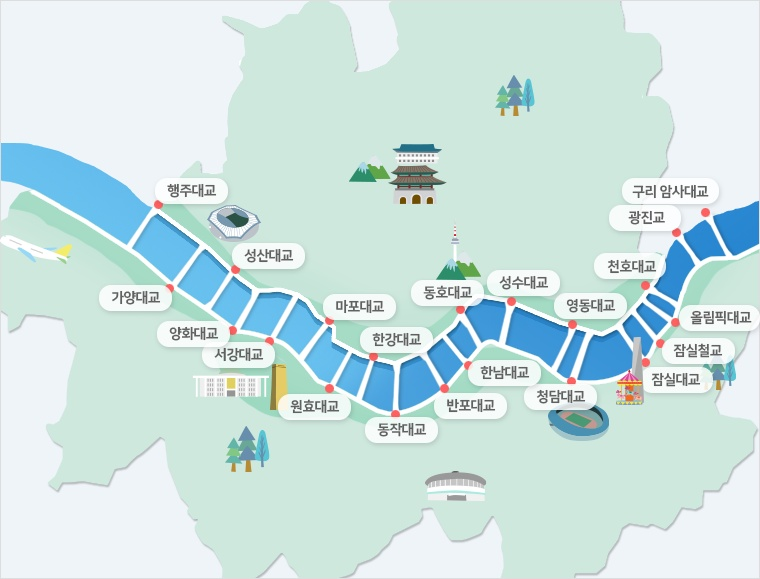

image.png

##데이터의 전처리
엑셀 데이터를 먼저 전터리 하는 과정을 학습합니다. 

자신이 관심 있는 자료를 조사하고 똑같은 방법으로 정리해봅시다. 

1. 자신이 전처리한 데이터를 불러옵니다. 

  코드를 실행시키는 방법은 왼쪽의 재생버튼을 클릭하거나, control+enter를 누르기 입니다. 





In [1]:
from google.colab import files #구글 코랩의 files라는 모듈을 불러옵니다. 
uploaded=files.upload() #파일을 선택하도록 창이 열리면, 처리할 파일을 선택합니다. 

Saving waterdata_2021_eng.csv to waterdata_2021_eng.csv


2. 데이터를 읽고, 변수로 이름을 지정해줍니다.
  
  판다스(pandas)는 표 형태의 데이터를 처리하는 패키지(모듈의 모음)입니다. 
  쉽게 말하면 파이썬의 엑셀이라고 보시면 됩니다. 

In [2]:
import pandas as pd #pandas라는 모듈을 불러옵니다. 
data=pd.read_csv('waterdata_2021_eng.csv') #파일을 못 읽으면 encoding='cp949'을 추가해서 실행하세요. 
data=pd.DataFrame(data) #data라는 변수로 파일의 이름을 지정해줍니다. 다른이름도 가능합니다. 

3. 데이터를 분석해보자. 

In [ ]:
data.tail() #head라는 함수는 전체데이터의 첫 5줄만 보여줍니다. tail은 마지막 5줄을 보여줍니다.

,month,day,height,input,contain,empty,output,sea,cdb,jsb,hgb,hjb
26491,10,31,25.04,56.0,212.86,31.14,157.0,NaN,269.7,258.2,265,253.3
26492,10,31,25.04,56.0,212.86,31.14,157.0,NaN,270.7,258.2,265,254.3
26493,10,31,25.04,56.0,212.86,31.14,157.0,NaN,270.7,258.2,265,254.3
26494,10,31,25.04,56.0,212.86,31.14,157.0,NaN,271.7,258.2,265,254.3
26495,10,31,25.04,56.0,212.86,31.14,157.0,NaN,270.7,258.2,265,254.3


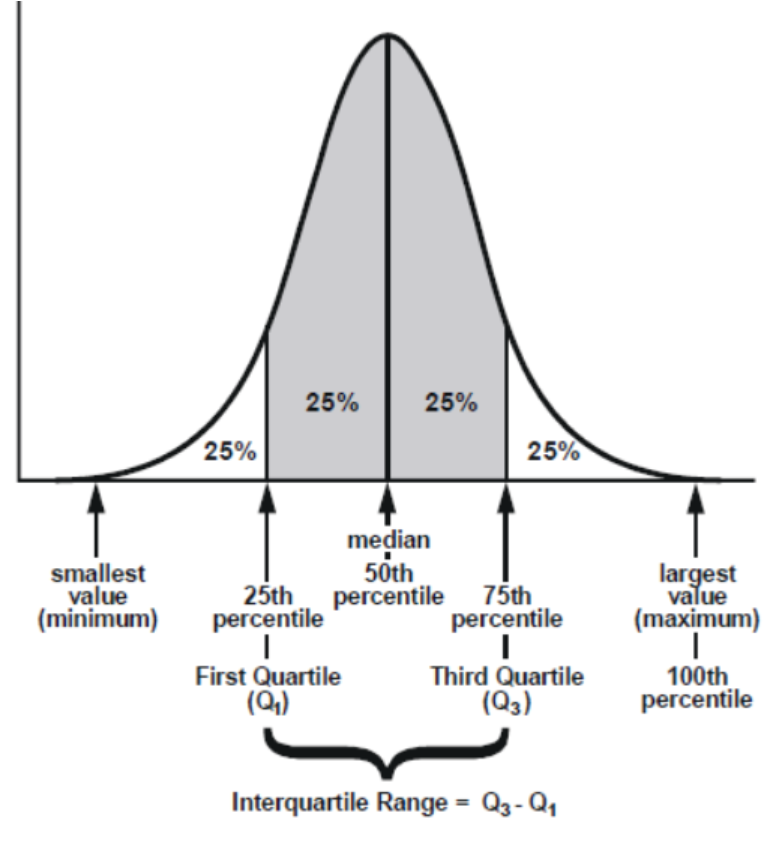

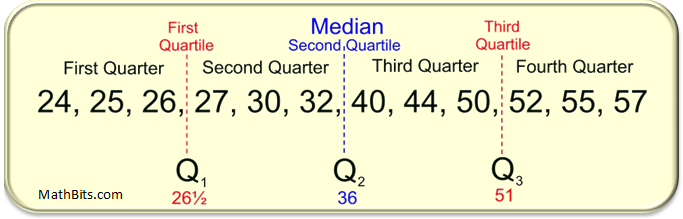

In [ ]:
data.describe() # 평균, 표준편차, 사분위수, 최대값, 최소값을 알려줍니다. 

,month,day,height,input,contain,empty,output,sea,cdb,jsb,hgb,hjb
count,26496.000000,26496.000000,26458.000000,26458.000000,26458.000000,26458.000000,26458.000000,23895.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,7.500000,15.836957,24.940149,374.358757,209.231132,34.768868,368.509751,352.206152,309.185885,301.760726,303.753850,288.966365
std,1.709978,8.854394,0.101850,330.244164,3.741925,3.741925,316.024240,167.158404,32.521809,30.452662,29.627729,26.594316
min,5.000000,1.000000,24.560000,0.000000,194.630000,18.930000,0.000000,62.000000,262.700000,258.200000,257.000000,247.300000
25%,6.000000,8.000000,24.870000,177.000000,206.730000,32.230000,177.000000,205.000000,286.700000,281.200000,283.000000,270.300000
50%,7.500000,16.000000,24.940000,338.000000,209.240000,34.760000,324.000000,337.000000,300.700000,294.200000,296.000000,283.300000
75%,9.000000,23.250000,25.010000,479.000000,211.770000,37.270000,435.000000,487.000000,322.700000,315.200000,317.000000,302.300000
max,10.000000,31.000000,25.370000,24675.000000,225.070000,49.370000,25056.000000,786.000000,476.700000,458.200000,454.000000,406.300000


In [ ]:
data.info() #데이터의 갯수와 형태를 알려줍니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    26496 non-null  int64  
 1   day      26496 non-null  int64  
 2   height   26458 non-null  float64
 3   input    26458 non-null  float64
 4   contain  26458 non-null  float64
 5   empty    26458 non-null  float64
 6   output   26458 non-null  float64
 7   sea      23895 non-null  float64
 8   cdb      26496 non-null  float64
 9   jsb      26496 non-null  float64
 10  hgb      26496 non-null  int64  
 11  hjb      26496 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 2.4 MB


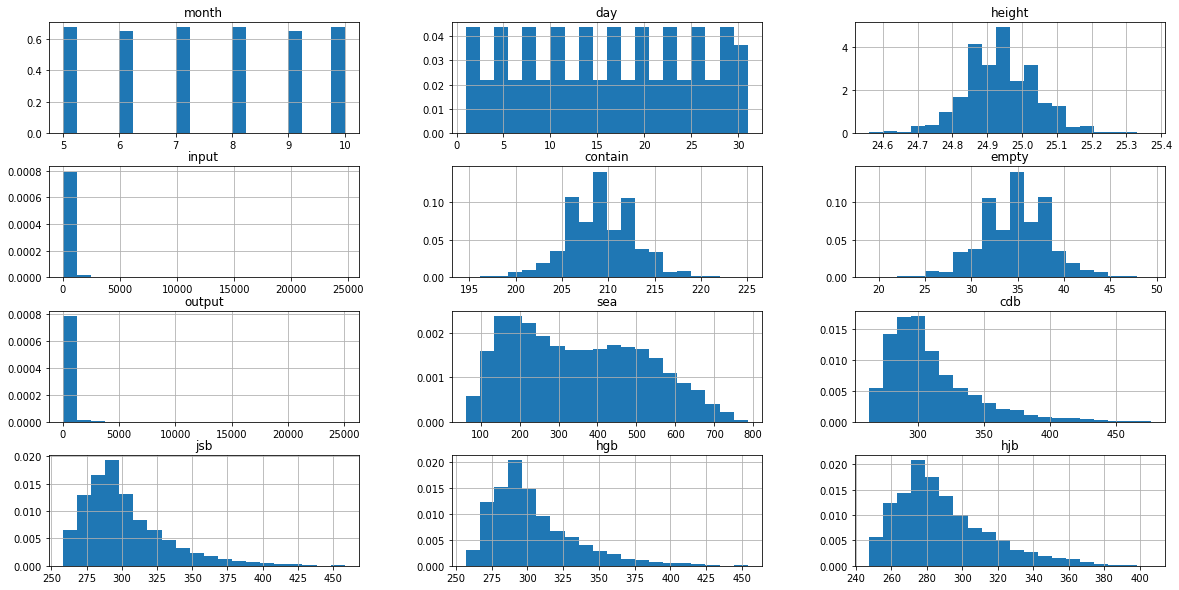

In [5]:
import matplotlib.pyplot as plt #맷플롯립은 데이터를 시각화하여 표와 그래로 보여주는 모듈입니다. 
data.hist(bins=20,density=True, figsize=(20,10)) #hist는 히스토그램을 의미하여 bins는 계급의 갯수, density는 상대도수, figsize는 크기 입니다.
plt.show()

In [6]:
data=data.dropna() #데이터에서 결측치가 있는 행을 삭제합니다. 

아래 그림은 상관계수에 대한 그림입니다. 

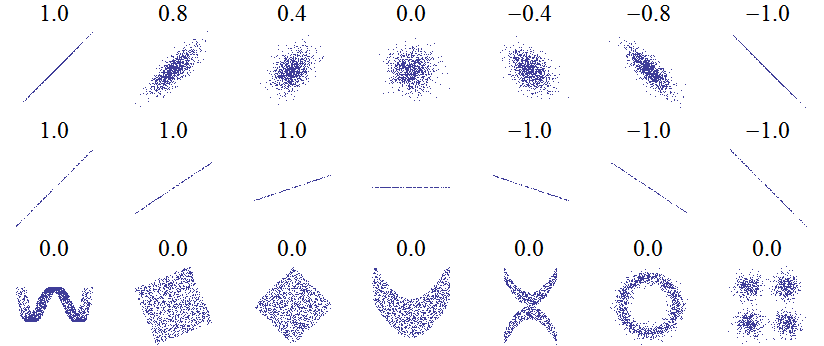

In [7]:
corr_matrix=data.corr()# 상관계수를 확인합니다. 
corr_matrix['jsb']

month      0.023823
day        0.097919
height     0.008030
input      0.331816
contain    0.006242
empty     -0.006242
output     0.359694
sea       -0.093857
cdb        0.990705
jsb        1.000000
hgb        0.995562
hjb        0.918171
Name: jsb, dtype: float64

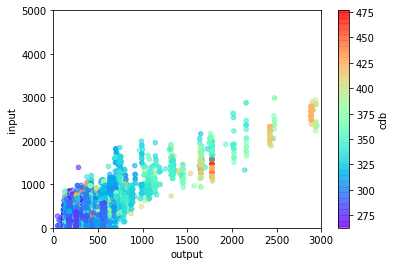

In [8]:
data.plot(kind='scatter', x='output',y='input',c='cdb' ,cmap='rainbow', alpha=0.6, sharex=False) #scatter는 산점도, c는 색상대상, cmap은 색tkd, alpha는 투명도, sharex는 테두리 없애기
plt.xlim(0,3000)# x축의 범위
plt.ylim(0,5000)# y축의 범위
plt.show()

4. 처리하고자하는 데이터의 열을 선택합니다. 

In [9]:
data1=data[['month','height','input','output','contain','empty','sea','cdb','jsb','hgb','hjb']]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23860 entries, 0 to 23959
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    23860 non-null  int64  
 1   height   23860 non-null  float64
 2   input    23860 non-null  float64
 3   output   23860 non-null  float64
 4   contain  23860 non-null  float64
 5   empty    23860 non-null  float64
 6   sea      23860 non-null  float64
 7   cdb      23860 non-null  float64
 8   jsb      23860 non-null  float64
 9   hgb      23860 non-null  int64  
 10  hjb      23860 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.2 MB


In [ ]:
data1.head()

,month,day,height,input,output,contain,empty,sea,cdb,jsb,hgb,hjb
0,5,1,24.93,0.0,138.0,208.88,35.12,311.0,361.7,346.2,340,301.3
1,5,1,24.93,0.0,138.0,208.88,35.12,297.0,356.7,338.2,335,308.3
2,5,1,24.92,0.0,138.0,208.52,35.48,283.0,347.7,331.2,331,313.3
3,5,1,24.92,0.0,151.0,208.52,35.48,271.0,337.7,327.2,329,315.3
4,5,1,24.92,0.0,151.0,208.52,35.48,259.0,328.7,323.2,327,316.3


5. 인공신경망의 시작입니다. 

In [30]:
x=data1[['month','height','input','output','contain','empty','sea','cdb']]
y=data1['jsb']

from sklearn.model_selection import train_test_split #데이터를 나누는 sklearn모듈을 불러옵니다. 
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

데이터의 형태를 행렬의 개념을 이용하여 설명합니다.

3학년 진로선택 기하과목에서 벡터를 베우는 데, 그 것을 확장한 것입니다. 

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16702, 8)
(16702,)
(7158, 8)
(7158,)


데이터를 표준화 시키는 작업을 합니다. 

확률과통계 시간에 학습한 내용을 생각해보면 평균이 0, 표준편차가 1인 데이터로 바꾸어 주는 것입니다. 

표준화는 왜 필요할까요? 처리하기 전 후의 오차를 비교해보세요. 

In [32]:
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train/=std

x_test-=mean
x_test/=std


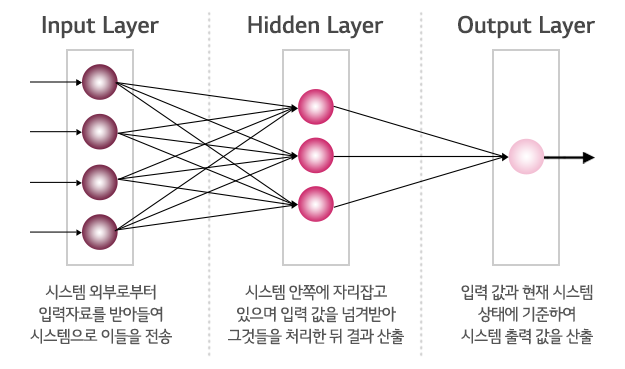

In [67]:
from tensorflow import keras #인공신경망을 다루는 파이썬 모듈
from tensorflow.keras.models import Sequential #인공신경망 시작한다는 뜻
from tensorflow.keras.layers import Dense # 인공신경망의 층을 넣는다는 뜻

model = Sequential()
model.add(Dense(10, input_dim=8,activation='relu')) # 노드 5개짜리 덴스 추가, relu는 활성화 함수
model.add(Dense(5, activation='relu')) # 노드 5개짜리 덴스 추가
model.add(Dense(1)) #출력층

optimizer=keras.optimizers.SGD(learning_rate=0.000001) #확률적 경사하강법, 학습률 확인
model.compile(optimizer=optimizer, loss='mse', metrics=['mae']) # 손실함수 mse, 옵티마이져는 SGD

In [68]:
hist = model.fit(x_train, y_train, shuffle=True, epochs=10, batch_size=10) #epoch는 반복횟수, batch_size=10는 데이터 10개 중에 1개 처리

Epoch 1/10
1671/1671 [==============================] - 4s 2ms/step - loss: 90833.0625 - mae: 299.8342
Epoch 2/10
1671/1671 [==============================] - 4s 2ms/step - loss: 19008.1348 - mae: 95.3607
Epoch 3/10
1671/1671 [==============================] - 4s 2ms/step - loss: 355.0419 - mae: 11.3191
Epoch 4/10
1671/1671 [==============================] - 4s 2ms/step - loss: 109.7153 - mae: 6.9083
Epoch 5/10
1671/1671 [==============================] - 4s 2ms/step - loss: 53.4842 - mae: 4.8715
Epoch 6/10
1671/1671 [==============================] - 4s 2ms/step - loss: 39.5730 - mae: 4.2376
Epoch 7/10
1671/1671 [==============================] - 4s 2ms/step - loss: 32.8314 - mae: 3.8917
Epoch 8/10
1671/1671 [==============================] - 4s 2ms/step - loss: 29.8638 - mae: 3.6500
Epoch 9/10
1671/1671 [==============================] - 4s 2ms/step - loss: 26.4471 - mae: 3.4634
Epoch 10/10
1671/1671 [==============================] - 4s 2ms/step - loss: 24.5727 - mae: 3.3200


In [69]:
pd.DataFrame(hist.history) # 손실함수의 결과를 표로 표현해보자. 

,loss,mae
0,90833.062500,299.834198
1,19008.134766,95.360695
2,355.041931,11.319139
3,109.715302,6.908251
4,53.484230,4.871453
5,39.572956,4.237647
6,32.831360,3.891720
7,29.863779,3.649965
8,26.447050,3.463421
9,24.572742,3.320044


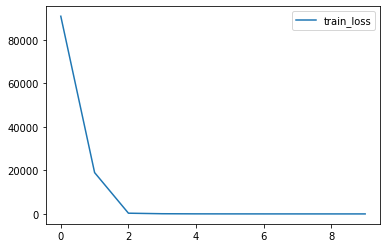

In [70]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train_loss')
plt.legend()
plt.show()

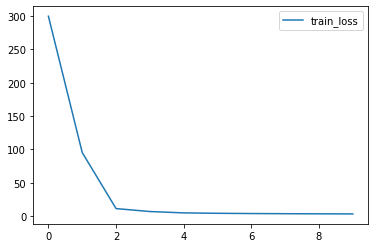

In [71]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'],  label='train_loss')
plt.legend()
plt.show()

In [72]:
y_pred=model.predict(x_test) #테스트데이터로 평가해보자. 

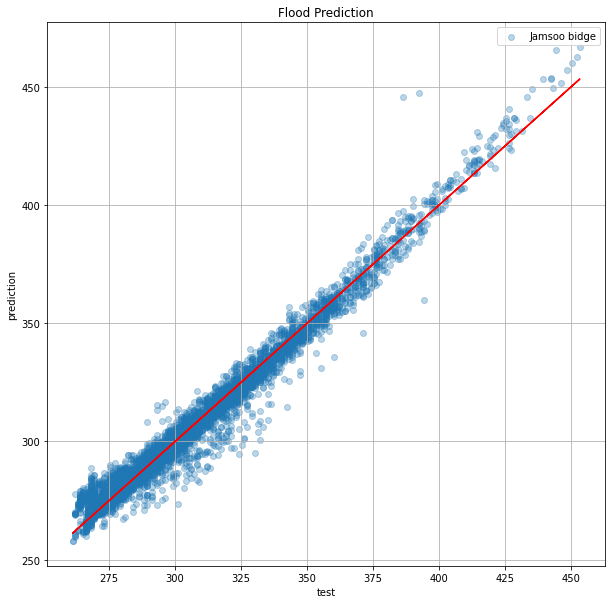

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.3, label='Jamsoo bidge') #alpha는 투명도
plt.plot(y_test,y_test, c='r')
plt.xlabel('test')
plt.ylabel('prediction')
plt.title('Flood Prediction')
plt.grid()
plt.legend()
plt.show()

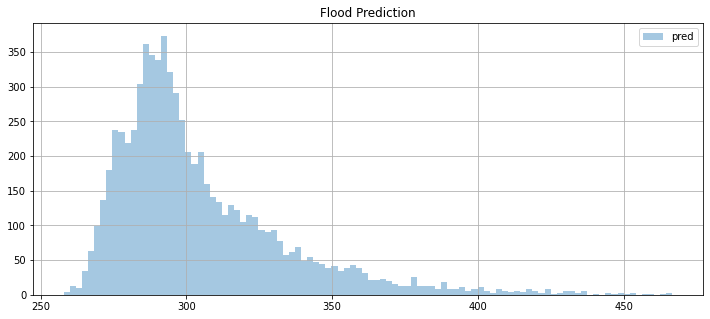

In [74]:
plt.figure(figsize=(12,5))
plt.hist(y_pred,bins=100,alpha=0.4, label='pred')
plt.title('Flood Prediction')
plt.grid()
plt.legend()
plt.show()

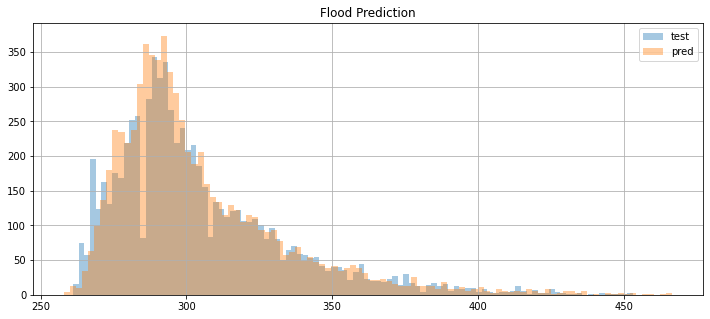

In [75]:
plt.figure(figsize=(12,5))
plt.hist(y_test, bins=100, alpha=0.4, label='test')
plt.hist(y_pred,bins=100,alpha=0.4, label='pred')
plt.title('Flood Prediction')
plt.grid()
plt.legend()
plt.show()